In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

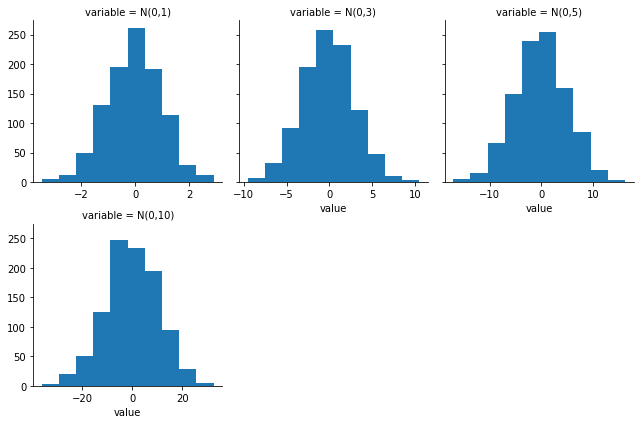

In [2]:
dictionary = {'N(0,1)':np.random.normal(0,1,1000),
             'N(0,3)':np.random.normal(0,3,1000),
             'N(0,5)':np.random.normal(0,5,1000),
             'N(0,10)':np.random.normal(0,10,1000)}
df = pd.DataFrame(dictionary)
df = df.melt()
g = sns.FacetGrid(df, col="variable", col_wrap=3, sharex=False)
g.map(plt.hist, "value")

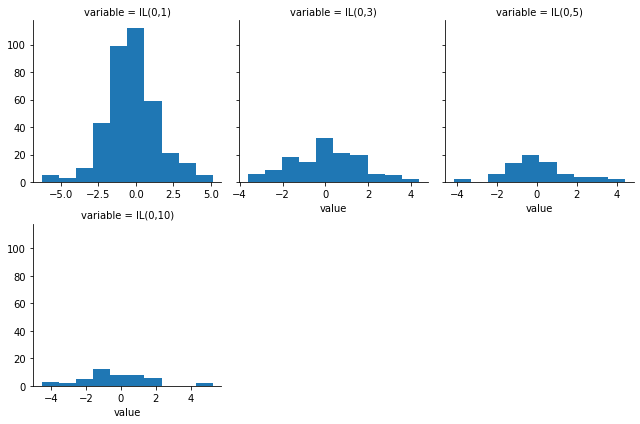

In [3]:
dictionary = {'IL(0,1)':sp.special.logit(np.random.normal(0,1,1000)),
             'IL(0,3)':sp.special.logit(np.random.normal(0,3,1000)),
             'IL(0,5)':sp.special.logit(np.random.normal(0,5,1000)),
             'IL(0,10)':sp.special.logit(np.random.normal(0,10,1000))}
df = pd.DataFrame(dictionary)
df = df.melt()
g = sns.FacetGrid(df, col="variable", col_wrap=3, sharex=False)
g.map(plt.hist, "value")

In [4]:
def print_grid(dictionary, bins = 10, cumulative = False):
    df = pd.DataFrame(dictionary)
    df = df.melt()
    g = sns.FacetGrid(df, col="variable", col_wrap=3, sharex=True)
    g.map(plt.hist, "value", bins = bins, cumulative = cumulative)

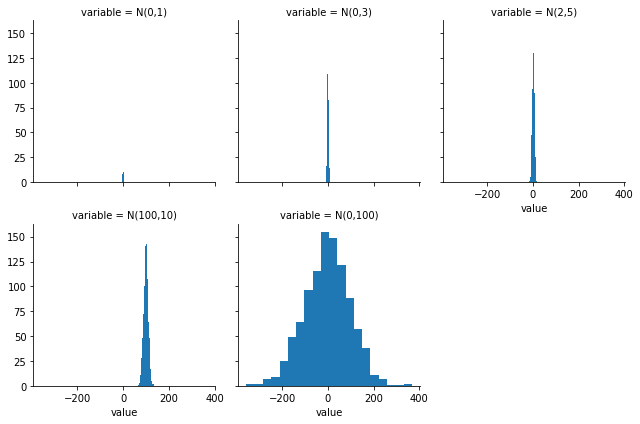

In [5]:
normal = {'N(0,1)':np.random.normal(0,1,1000),
             'N(0,3)':np.random.normal(0,3,1000),
             'N(2,5)':np.random.normal(2,5,1000),
             'N(100,10)':np.random.normal(100,10,1000),
         'N(0,100)':np.random.normal(0,100,1000)}
print_grid(normal, 20, False)

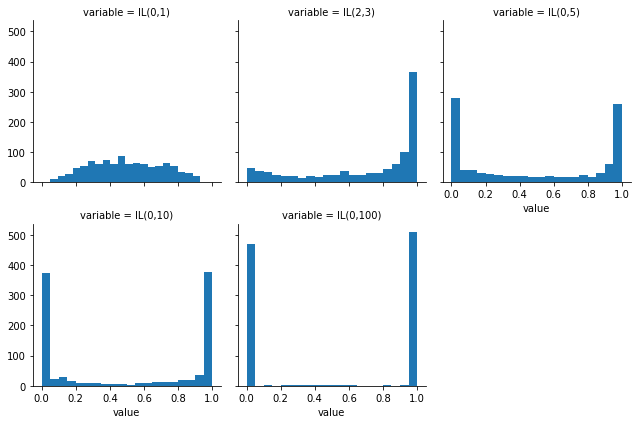

In [6]:
inverse_logit = {'IL(0,1)':sp.special.expit(np.random.normal(0,1,1000)),
             'IL(2,3)':sp.special.expit(np.random.normal(2,3,1000)),
             'IL(0,5)':sp.special.expit(np.random.normal(0,5,1000)),
             'IL(0,10)':sp.special.expit(np.random.normal(0,10,1000)),
            'IL(0,100)':sp.special.expit(np.random.normal(0,100,1000))}
print_grid(inverse_logit, 20, False)

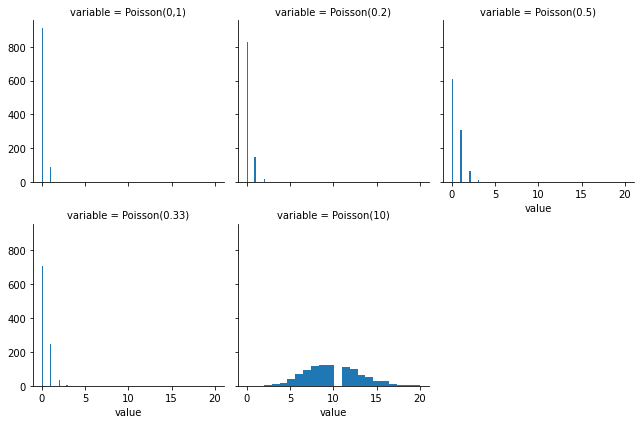

In [7]:
poisson = {'Poisson(0,1)':np.random.poisson(0.1,1000),
             'Poisson(0.2)':np.random.poisson(0.2,1000),
             'Poisson(0.5)':np.random.poisson(0.5,1000),
             'Poisson(0.33)':np.random.poisson(0.33,1000),
            'Poisson(10)':np.random.poisson(10,1000)}
print_grid(poisson, 20, False)

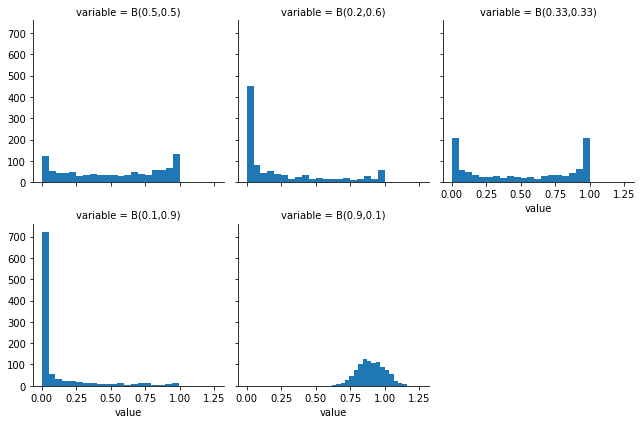

In [8]:
beta = {'B(0.5,0.5)':np.random.beta(0.5,0.5,1000),
             'B(0.2,0.6)':np.random.beta(0.2,0.6,1000),
             'B(0.33,0.33)':np.random.beta(0.33,0.33,1000),
             'B(0.1,0.9)':np.random.beta(0.1,0.9,1000),
         'B(0.9,0.1)':np.random.normal(0.9,0.1,1000)}
print_grid(beta, 20, False)

In [9]:
def get_mean(alpha, beta):
    return alpha / (alpha + beta)

def get_variance(alpha, beta):
    temp = get_mean(alpha, beta)
    return temp * (1 - temp) * (1/(alpha + beta + 1))